In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..") # Adds higher directory to python modules path.

print(f"Current working dir is {os.getcwd()}")

from utils import *
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 7]

Current working dir is /home/jma/Python3.7/Cubist_2021_11/dataset_process


In [2]:
# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'
dtcol = 'data_date'
seccol = 'security_id'

ds_id = 3
ds_filename = f'data_set_{ds_id}.csv'
scorecol = f'd{ds_id}'

In [3]:
df = preprocess_dataset_from_one_to_seven(data_root, ds_id, dtcol=dtcol, seccol=seccol)

Getting data from file 'data_set_3.csv' for score 'd3'.

df.head():
        data_date security_id  d3
99935  2010-01-04     1178501 NaN
142250 2010-01-04     1178501 NaN
99936  2010-01-04     1323901 NaN
144751 2010-01-04     1323901 NaN
99937  2010-01-04     1384501 NaN.

df.tail():
        data_date security_id        d3
254440 2017-12-27  1117183801       NaN
22610  2017-12-28      647001 -0.034732
134142 2017-12-28      647001 -0.034732
33337  2017-12-29     2968101 -0.000221
163183 2017-12-29     2968101 -0.000221.

getting df shape of (254532, 3).

WARNING! There are duplicated data_date and security_id pairs! There are total 127266 duplicated rows
  Will follow pre-defined logics to remove bad data and get the average value
           min_d3      max_d3      avg_d3  avg_min_pct  avg_max_pct
count  99933.0000  99933.0000  99933.0000      99910.0      99910.0
mean       0.1244      0.1244      0.1244          1.0          1.0
std       38.2297     38.2297     38.2297          0.0 

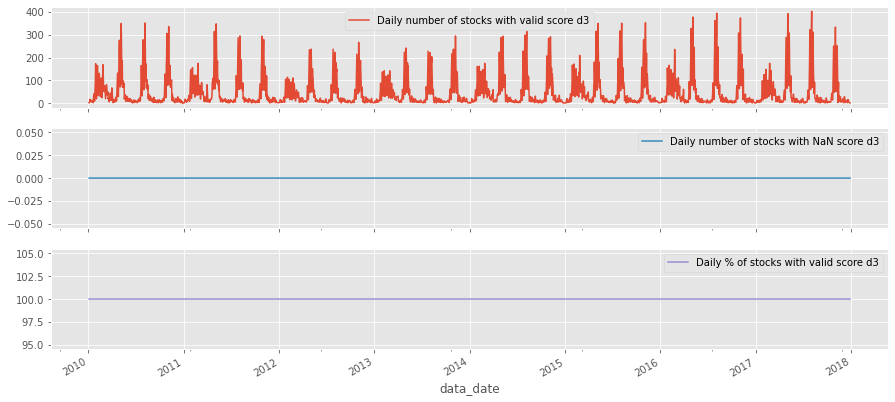

In [4]:
# plot the daily stock counts
plot_daily_stock_count(df, scorecol, dtcol=dtcol)

In [5]:
## Since 0 normally carries useless information in this type of sparse dataset, thus we replace 0 with NaN and drop them 
print(df.isnull().sum())
df[scorecol] = df[scorecol].replace([0, np.inf, -np.inf], np.nan)
print(df.isnull().sum())

data_date      0
security_id    0
d3             0
dtype: int64
data_date      0
security_id    0
d3             0
dtype: int64


 Dropping all NaNs
                 d3
count  99910.000000
mean       0.124463
std       38.234137
min     -356.424242
25%       -0.025080
50%        0.028806
75%        0.063935
max    12051.111111


<AxesSubplot:>

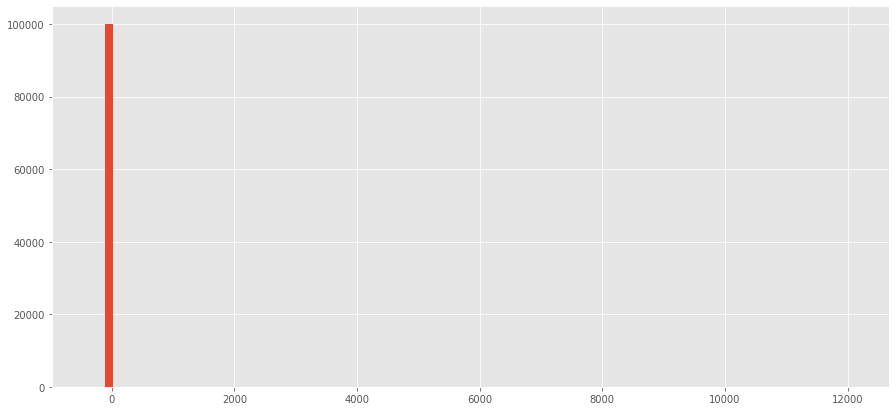

In [6]:
print(" Dropping all NaNs")
df.dropna(subset=[scorecol], inplace=True)
print(df.describe())
df[scorecol].hist(bins=100)

In [7]:
print("Loading the generated research universe")
rsch_universe = pd.read_csv(os.path.join(data_root, 'new_processed_csvs/new_rsch_universe.csv.gz'), compression='gzip',
                            usecols=[dtcol, seccol],
                            parse_dates=[dtcol], dtype={seccol: str})

Loading the generated research universe


In [9]:
print("Merging the dataset with research universe\n")
data = pd.merge(df, rsch_universe, on=[dtcol, seccol], how='inner')
print("Counting NaNs for each column.\n", data.isnull().sum())

Merging the dataset with research universe

Counting NaNs for each column.
 data_date      0
security_id    0
d3             0
dtype: int64


<AxesSubplot:title={'center':'Daily d3 #stocks falling into the trading universe'}, xlabel='data_date'>

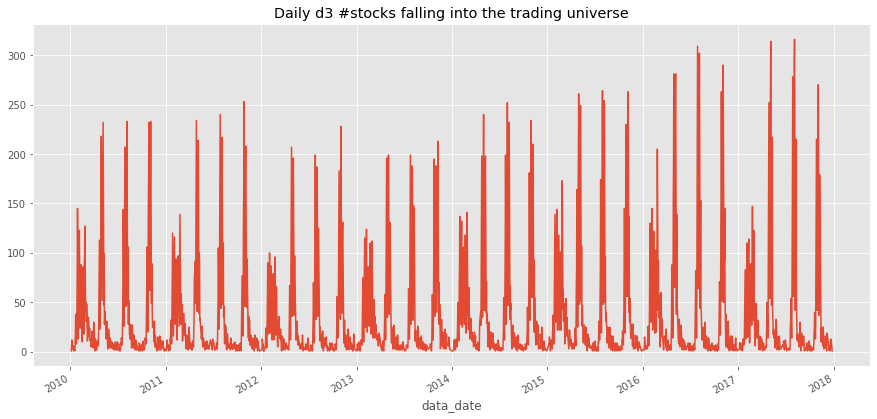

In [10]:
data.groupby(dtcol).size().plot(title=f'Daily {scorecol} #stocks falling into the trading universe')

In [11]:
save_file_path = os.path.join(data_root, f'new_processed_csvs/new_data_{ds_id}.csv.gz')
print(f"data is saved to {save_file_path}")
data.to_csv(save_file_path, index=False, compression='gzip')

data is saved to /home/jma/Python3.7/Cubist_2021_11/new_processed_csvs/new_data_3.csv.gz


In [1]:
data.loc[data[dtcol] >= '2016-01-01'].groupby(dtcol).size().plot(title=f'Daily {scorecol} #stocks falling into the trading universe')

NameError: name 'data' is not defined

In [ ]:
plot_timeseries_dist(data, scorecol, dtcol, plot_min_max=False)